In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
import pickle

from compgen2 import LocCorrection, Gov

# Concept

## Levenshtein-Distance is our root metric to search for candidates from 'ground truth' (GOV data) for candidates that can potentially correct the missspelling that occured in 'Verlustlisten'

#### taking two strings as input, each indexed as i and j, levenshtein distance of the two strings are culmulatively calculated based on letters depending on insert, delete, replace costs and presented as a matrix as shown below. 

#### The following gives an example of calculating the levenstein distance between ground truth 'Berlin' and misspelling 'Berlyn'. The right botton corner of the matrix shows the levenstein distance of two strings: 1. 

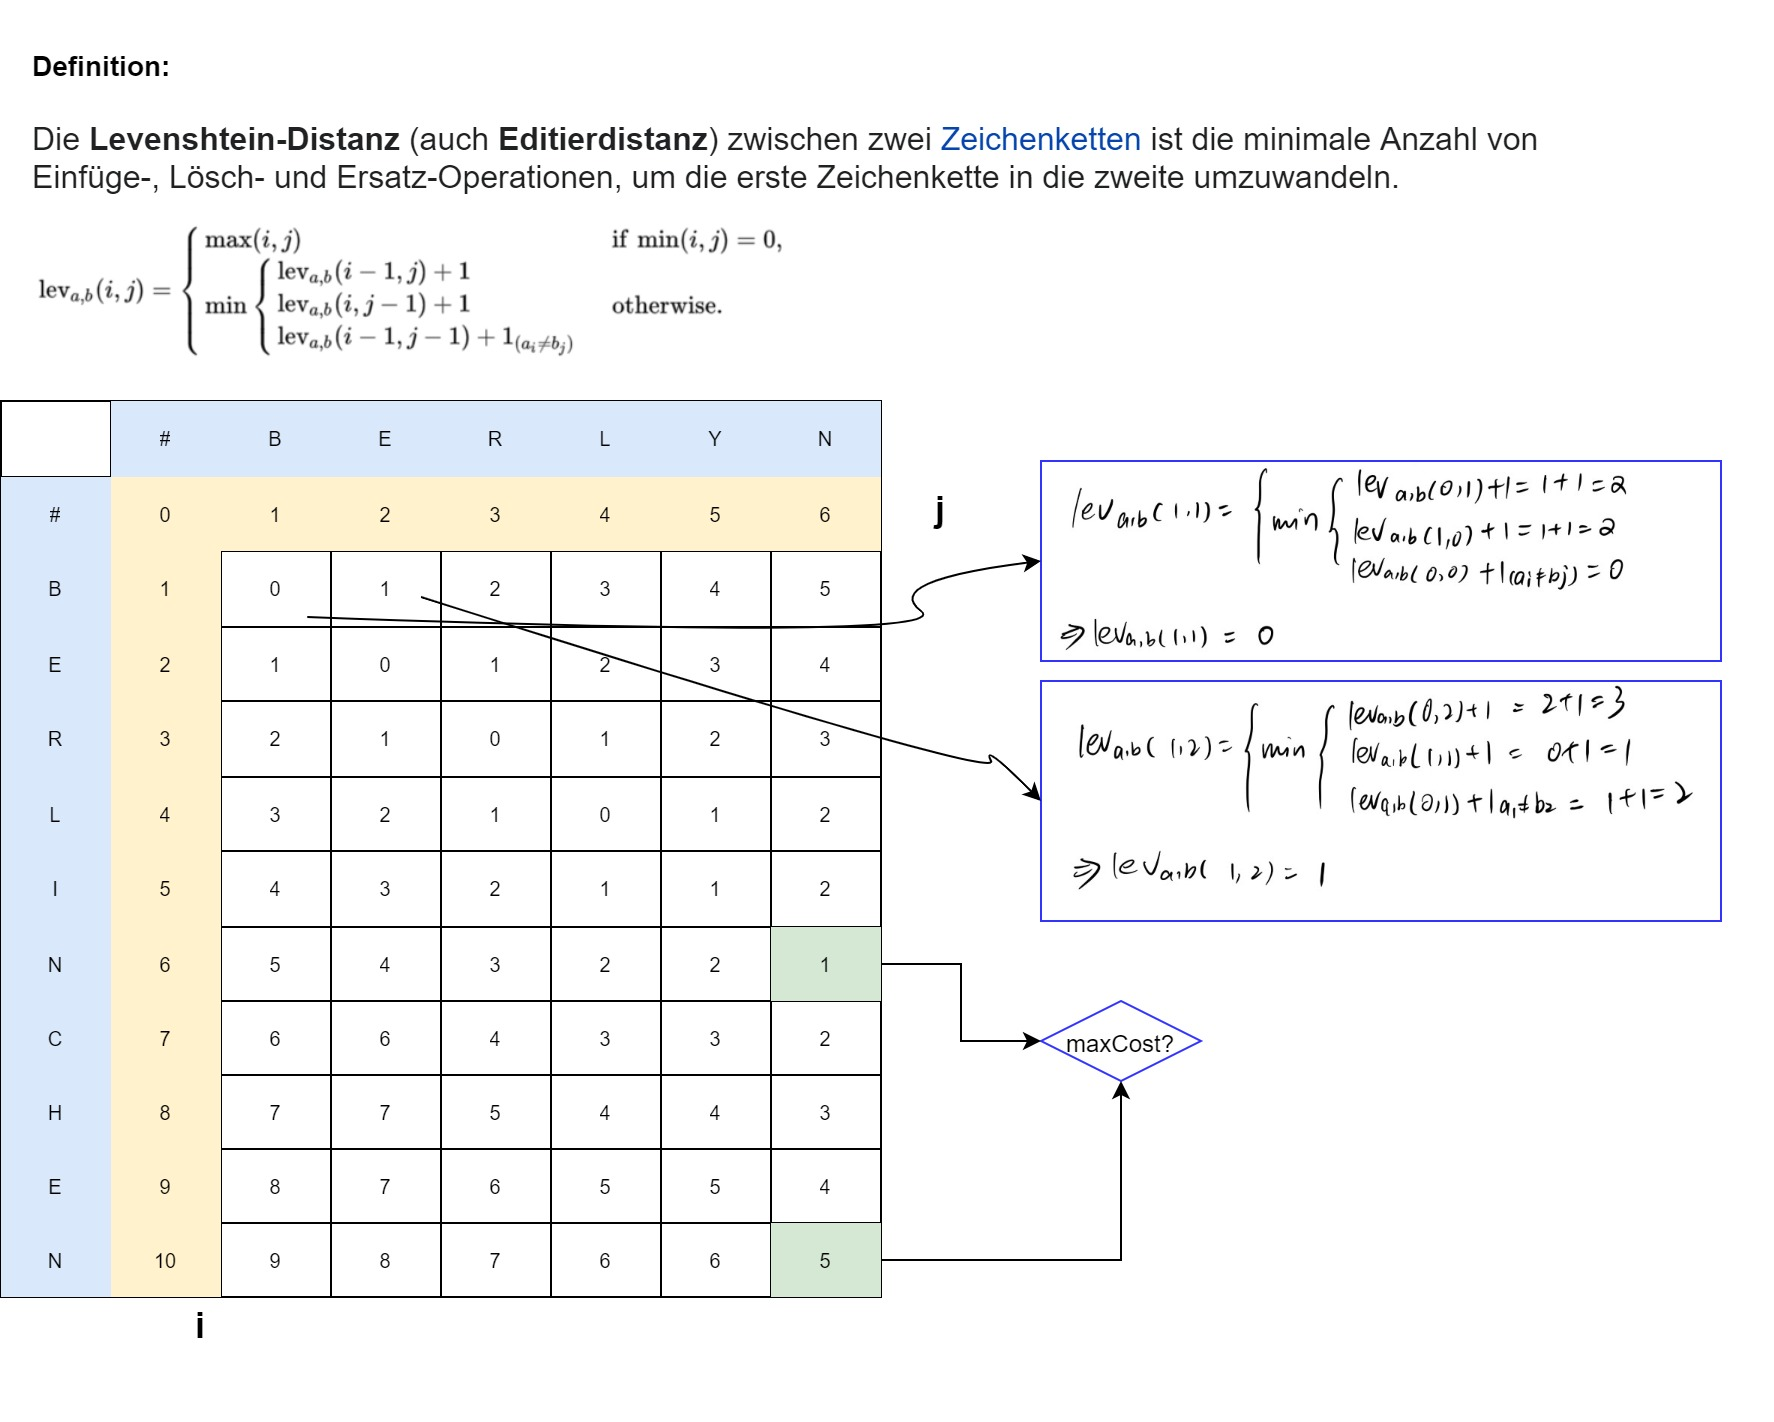

In [1]:
from IPython.display import display, Image
display(Image(filename='images/lev.jpg'))

#### To reduce the computation cost, we introduce 'Trie' as the data structure to store ground truth location list. 
#### as shown below, each ground truth locations are inserted in the TRIE, and locations that are alphabetically extenstion of each other are stored in the same branch. In this way, we reduce the recaculation of certain part of levenstein matrix if two locations like 'Berlin' and 'Berlinchen' have the same prefix and are compared to the same misspelled string 'Berlyn'. 

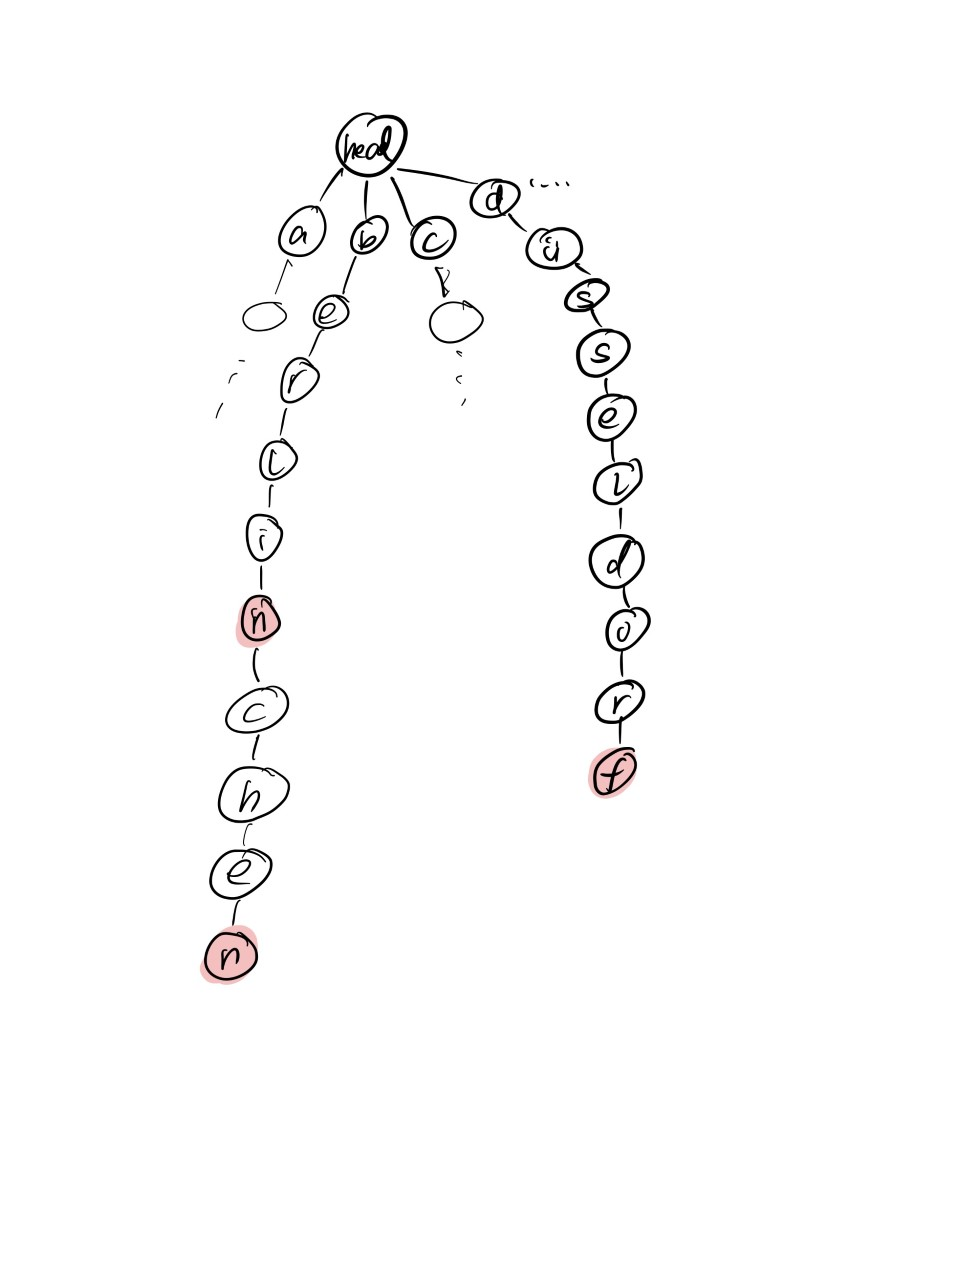

In [2]:
display(Image(filename='images/trie.jpg'))

LocCorrection requires an initialized Gov instance

In [4]:
data_root = "../data"
gov = Gov(data_root)
gov.load_data()
gov.build_indices()

Initialize a new instance of LocCorrection with a tuple of names

In [5]:
lC = LocCorrection.from_list(tuple(gov.get_loc_names()))

## Using `LocCorrection` class to find candidates

#### LocCorrection Object is established to take in 'ground truth' locations, which are stored in a TRIE.

#### Misspelled word is then compared to each branch of the trie, and found candidates are then added to the results if the calculated levenstein distance is lower than input 'maxCost'.
#### As a feature, our module only outputs the valid candidate with the lowest cost.

In [6]:
candidates = lC.search("alt vahn", 2)

candidates

[('alte bahn', 2), ('alt kahl', 2), ('alt valm', 2), ('altjahn', 2)]

In [11]:
candidates = lC.search("achen", 2)

candidates

[('walchen', 2),
 ('wacken', 2),
 ('höchen', 2),
 ('höhen', 2),
 ('hohen', 2),
 ('hacken', 2),
 ('hache', 2),
 ('hachen', 1),
 ('alchen', 1),
 ('aachen', 1),
 ('aschen', 1),
 ('aichen', 1),
 ('achern', 1),
 ('achen', 0)]

In [18]:
candidates = lC.search("neustadt o. s.", 3)

candidates

[('neustadt i.sa.', 3), ('neustadt i. sa.', 2), ('neustadt o.s.', 1)]

In [35]:
candidates = lC.search("Oberfr.", 5)

candidates

[('weifa', 5),
 ('weier', 5),
 ('weiert', 5),
 ('weirer', 5),
 ('weira', 5),
 ('weedern', 5),
 ('weener', 5),
 ('weepers', 5),
 ('westre', 5),
 ('wengry', 5),
 ('weger', 5),
 ('wegern', 5),
 ('wegerer', 5),
 ('wegfurt', 5),
 ('weber', 5),
 ('webers', 5),
 ('weberberg', 5),
 ('weberhof', 5),
 ('weberei', 5),
 ('webern', 5),
 ('weberau', 5),
 ('webertal', 5),
 ('webergrub', 5),
 ('weburg', 5),
 ('werd', 5),
 ('werde', 5),
 ('werder', 5),
 ('werdern', 5),
 ('werden', 5),
 ('werdum', 5),
 ('werda', 5),
 ('werdau', 5),
 ('werdorf', 5),
 ('werth', 5),
 ('werte', 5),
 ('werben', 5),
 ('werberg', 5),
 ('werbig', 5),
 ('werbiż', 5),
 ('werve', 5),
 ('werne', 5),
 ('werna', 5),
 ('wernarz', 5),
 ('wersch', 5),
 ('wersau', 5),
 ('werse', 5),
 ('wersen', 5),
 ('wersk', 5),
 ('werk', 5),
 ('wermert', 5),
 ('werl', 5),
 ('werle', 5),
 ('werlau', 5),
 ('werlte', 5),
 ('werwe', 5),
 ('werwer', 5),
 ('werry', 4),
 ('werfer', 4),
 ('werfen', 4),
 ('wierer', 4),
 ('wobern', 4),
 ('wobeser', 4),
 ('herfen